## Concerts
🤘🏻🤘🏻🤘🏻

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
sheet_id = "1t8yUN7srGyxqWzXTJfoeZOGyyF8iK6DNl-qqL-8mWUI"
sheet_name = "Concerts"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [3]:
df = pd.read_csv(url)
df.head()

,Band,Date,Location,State,City,Ticket Price [EUR],Act,Notes,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Machine Head,19.04.2018,Gasometer,Austria,Vienna,"39,99",Headliner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scorpions,02.08.2019,Burg Clam,Austria,Vienna,"72,90",Headliner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Battle Beast,22.02.2020,Gasometer,Austria,Vienna,NaN,Support,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Powerwolf,06.11.2018,Arena Wien,Austria,Vienna,"34,50",Headliner,Wolfsnächte,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Slash,10.02.2019,Gasometer,Austria,Vienna,"57,99",Headliner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['price'] = pd.to_numeric(df['Ticket Price [EUR]'].replace(',', '.', regex=True))
# new comment
df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y")
df['year'] = df['Date'].dt.strftime('%Y') # pd.to_numeric(df['Date'].dt.strftime('%Y'))

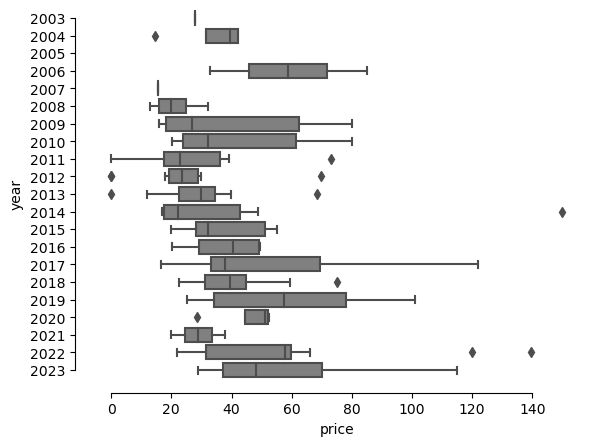

In [5]:
sns.boxplot(y="year", x="price", data=df, color='grey', order=sorted(df['year'].unique()))
sns.despine(offset=10, trim=True)

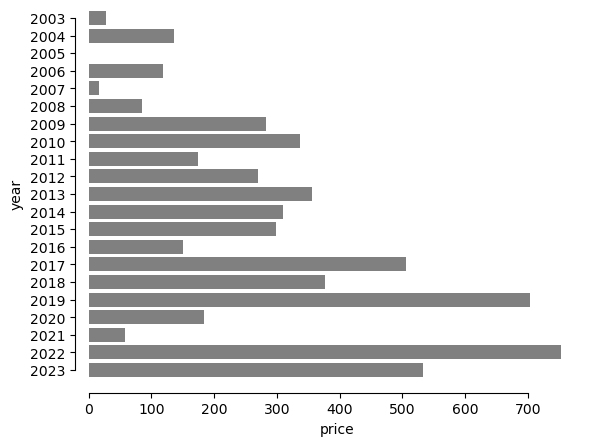

In [6]:
# bis exkl. hier
sum_per_year = df.groupby('year')['price'].sum().reset_index()
sns.barplot(x='price', y='year', data=sum_per_year, color='grey', order=sorted(df['year'].unique()))
sns.despine(offset=10, trim=True)

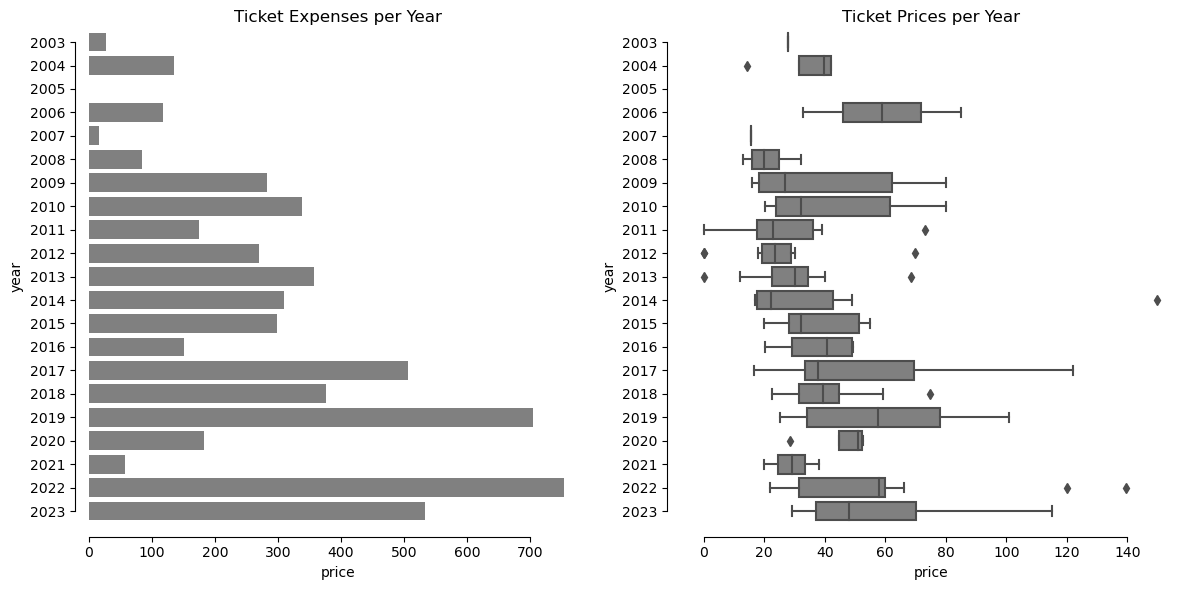

In [7]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bara chart
sns.barplot(x='price', y='year', data=sum_per_year, color='grey', ax=ax1)
sns.despine(offset=10, trim=True, ax=ax1)
ax1.set_title('Ticket Expenses per Year')

# Box plot
sns.boxplot(y="year", x="price", data=df, color='grey', order=sorted(df['year'].unique()), ax=ax2)
sns.despine(offset=10, trim=True, ax=ax2)
ax2.set_title('Ticket Prices per Year')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

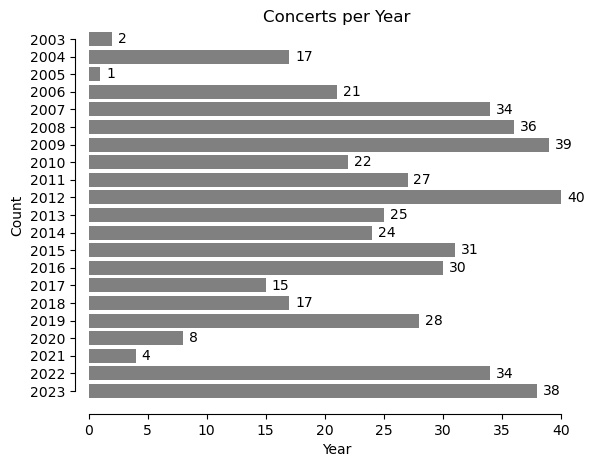

In [8]:
data_distribution = df.groupby(['year']).size().reset_index(name='Count')
sns.barplot(x='Count', y='year', data=data_distribution, color='grey')
sns.despine(offset=10, trim=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Concerts per Year')

for index, row in data_distribution.iterrows():
    plt.text(row['Count'] + 0.5, index, str(row['Count']), ha='left', va='center', fontsize=10, color='black')

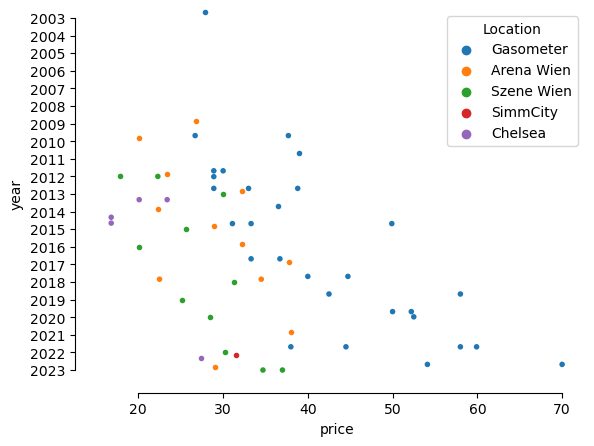

In [9]:
df_vienna = df[df['Location'].isin(["Chelsea", "Szene Wien", "SimmCity", "Arena Wien", "Gasometer", "Wiener Stadthalle"])] 
sns.swarmplot(y="year", x="price", data=df_vienna, hue='Location', dodge=True, order=sorted(df['year'].unique()), size=4)
sns.despine(offset=10, trim=True)